<a href="https://colab.research.google.com/github/sr-bn98/skills-copilot-codespaces-vscode/blob/main/brain_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torchinfo

In [3]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sarabana","key":"a0d4a93e7cb3c71b75d6870c787d479b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d nikhilroxtomar/brain-tumor-segmentation

Dataset URL: https://www.kaggle.com/datasets/nikhilroxtomar/brain-tumor-segmentation
License(s): unknown
 99% 310M/312M [00:03<00:00, 34.5MB/s]
100% 312M/312M [00:04<00:00, 74.9MB/s]


In [6]:
import zipfile

zip_path = '/content/brain-tumor-segmentation.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    folders = [f for f in zip_contents if f.endswith('/')]
    print("Folders in the ZIP file:")
    print(folders)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    print("Contents of the ZIP file:")
    print(zip_contents)

Folders in the ZIP file:
[]
Contents of the ZIP file:
['images/1.png', 'images/10.png', 'images/100.png', 'images/1000.png', 'images/1001.png', 'images/1002.png', 'images/1003.png', 'images/1004.png', 'images/1005.png', 'images/1006.png', 'images/1007.png', 'images/1008.png', 'images/1009.png', 'images/101.png', 'images/1010.png', 'images/1011.png', 'images/1012.png', 'images/1013.png', 'images/1014.png', 'images/1015.png', 'images/1016.png', 'images/1017.png', 'images/1018.png', 'images/1019.png', 'images/102.png', 'images/1020.png', 'images/1021.png', 'images/1022.png', 'images/1023.png', 'images/1024.png', 'images/1025.png', 'images/1026.png', 'images/1027.png', 'images/1028.png', 'images/1029.png', 'images/103.png', 'images/1030.png', 'images/1031.png', 'images/1032.png', 'images/1033.png', 'images/1034.png', 'images/1035.png', 'images/1036.png', 'images/1037.png', 'images/1038.png', 'images/1039.png', 'images/104.png', 'images/1040.png', 'images/1041.png', 'images/1042.png', 'imag

In [7]:
!unzip brain-tumor-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/2013.png         
  inflating: images/2014.png         
  inflating: images/2015.png         
  inflating: images/2016.png         
  inflating: images/2017.png         
  inflating: images/2018.png         
  inflating: images/2019.png         
  inflating: images/202.png          
  inflating: images/2020.png         
  inflating: images/2021.png         
  inflating: images/2022.png         
  inflating: images/2023.png         
  inflating: images/2024.png         
  inflating: images/2025.png         
  inflating: images/2026.png         
  inflating: images/2027.png         
  inflating: images/2028.png         
  inflating: images/2029.png         
  inflating: images/203.png          
  inflating: images/2030.png         
  inflating: images/2031.png         
  inflating: images/2032.png         
  inflating: images/2033.png         
  inflating: images/2034.png         
  inflating: images/2035.png         

In [8]:
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.2.0"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━

In [9]:

import os
import torch
import monai
import random

import matplotlib.pyplot as plt
from glob import glob

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import cv2
from PIL import Image

import shutil
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.11/dist-packages/ignite/handlers/checkpoint.py:17: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


In [12]:
import hashlib


def compute_image_hash(image_path):
    with Image.open(image_path) as img:
        img = img.resize((256, 256)).convert("RGB")
        return hashlib.md5(img.tobytes()).hexdigest()


In [10]:
images_dir='/content/images'
masks_dir='/content/masks'


train_dir='/content/train'
test_dir='/content/test'

train_msk_dir='/content/train/masks'
train_img_dir='/content/train/images'

test_msk_dir='/content/test/masks'
test_img_dir='/content/test/images'


In [13]:

def check_duplicates(directory):
    hash_dict = {}
    duplicate_files = []

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        file_hash = compute_image_hash(file_path)

        if file_hash in hash_dict:
            duplicate_files.append((filename, hash_dict[file_hash]))
        else:
            hash_dict[file_hash] = filename

    return duplicate_files


duplicate_images = check_duplicates(images_dir)
duplicate_masks = check_duplicates(masks_dir)


if duplicate_images:
    print("Duplicate images found:")
    for dup in duplicate_images:
        print(f"{dup[0]} is a duplicate of {dup[1]}")
else:
    print("No duplicate images found.")

if duplicate_masks:
    print("Duplicate masks found:")
    for dup in duplicate_masks:
        print(f"{dup[0]} is a duplicate of {dup[1]}")
else:
    print("No duplicate masks found.")


No duplicate images found.
No duplicate masks found.


In [14]:
img_list = glob(os.path.join('/content/images', '*'))
msk_list = glob(os.path.join('/content/masks', '*'))
import random
random.seed(42)

print('There are:', len(img_list), 'images')
print('A random image in img_list:', random.choice(img_list))
print('There are:', len(msk_list), 'masks')
print('A random mask in msk_list:', random.choice(msk_list))




There are: 3064 images
A random image in img_list: /content/images/1292.png
There are: 3064 masks
A random mask in msk_list: /content/masks/709.png


In [15]:
images_dir='/content/images'
masks_dir='/content/masks'


train_dir='/content/train'
test_dir='/content/test'


os.mkdir(train_dir)
os.mkdir(test_dir)


train_msk_dir='/content/train/masks'
train_img_dir='/content/train/images'

test_msk_dir='/content/test/masks'
test_img_dir='/content/test/images'


os.mkdir(train_msk_dir)
os.mkdir(train_img_dir)

os.mkdir(test_msk_dir)
os.mkdir(test_img_dir)


[('1090.png', '1090.png'), ('975.png', '975.png'), ('2011.png', '2011.png'), ('1901.png', '1901.png')]


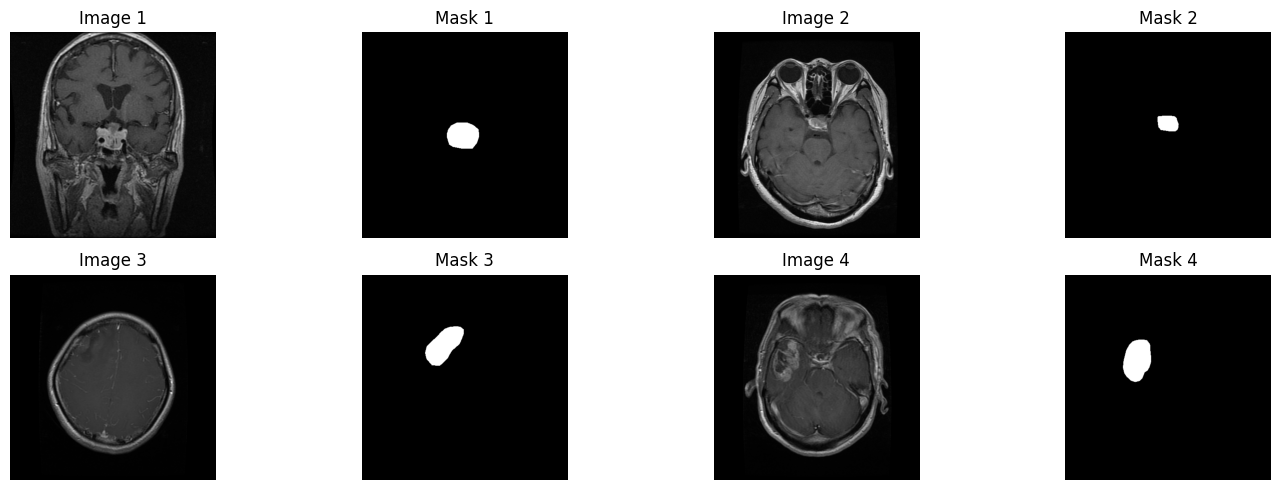

In [16]:
# showing 4 random images and related masks

import random
import os
img_list = sorted(os.listdir(images_dir))
msk_list = sorted(os.listdir(masks_dir))
selected_pairs = random.sample(list(zip(img_list, msk_list)), k=4)

print(selected_pairs)
plt.figure(figsize=(15,5))
for i,(img_file, msk_file) in enumerate(selected_pairs):
    img_src_path = os.path.join(images_dir, img_file)
    msk_src_path = os.path.join(masks_dir, msk_file)
    plt.subplot(2, 4, 2 * i + 1)
    img = Image.open(img_src_path)
    plt.imshow(img,cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')


    plt.subplot(2, 4, 2 * i + 2)
    msk = Image.open(msk_src_path)
    plt.imshow(msk, cmap='gray')
    plt.title(f"Mask {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split


# Splitting into train (80%) and remaining (20%)
train_img_list, test_img_list = train_test_split(img_list, test_size=0.2, random_state=12)
train_msk_list, test_msk_list = train_test_split(msk_list, test_size=0.2, random_state=12)



print(f" Training images: {len(train_img_list)},\n Training masks: {len(train_msk_list)}")
print(f" Test images: {len(test_img_list)},\n Test masks: {len(test_msk_list)}")

print(train_img_list[0])

 Training images: 2451,
 Training masks: 2451
 Test images: 613,
 Test masks: 613
2970.png


In [70]:
import os
from glob import glob


directory = ['/content/test/images' ,'/content/test/masks','/content/train/images','/content/train/masks']




for dir in directory:
  png_files = glob(os.path.join(dir, "*.png"))
  print(len(png_files))


613
613
2451
2451


In [71]:

train_img_path = '/content/train/images'
train_msk_path = '/content/train/masks'
test_img_path = '/content/test/images'
test_msk_path = '/content/test/masks'

def list_of_dir(dir):
  image_list=[]
  for image in os.listdir(dir):
    image_path = os.path.join(dir, image)
    image_list.append(image_path)
  return image_list



In [72]:
train_img_list = list_of_dir(train_img_path)
test_img_list = list_of_dir(test_img_path)


train_msk_list= list_of_dir(train_msk_path)
test_msk_list = list_of_dir(test_msk_path)


In [59]:
def copy_files(img_list, msk_list, img_src_dir, msk_src_dir, img_dest_dir, msk_dest_dir):
  for image , mask in zip(img_list, msk_list):
    img_path=os.path.join(img_src_dir,image)
    msk_path=os.path.join(msk_src_dir,mask)
    shutil.copy(img_path,img_dest_dir)
    shutil.copy(msk_path,msk_dest_dir)



In [60]:
copy_files(train_img_list, train_msk_list, '/content/images', '/content/masks', '/content/train/images', '/content/train/masks')

copy_files(test_img_list, test_msk_list, '/content/images', '/content/masks', '/content/test/images', '/content/test/masks')

In [78]:
train_files = [{"image": img, "seg": mask} for img, mask in zip(train_img_list, train_msk_list)]
test_files = [{"image": img, "seg": mask} for img, mask in zip(test_img_list, test_msk_list)]

In [74]:
print(train_files[9])
print(len(train_files))
print(len(test_files))


{'image': '/content/train/images/2488.png', 'label': '/content/train/masks/2488.png'}
2451
613


In [92]:

from monai.data import Dataset, DataLoader

import torch
from monai.transforms import (
    Compose,EnsureChannelFirstD,CropForegroundd,AddChanneld,Orientationd, LoadImaged, EnsureChannelFirstd, Resized, ScaleIntensityd, ToTensord,AddChanneld
)


train_transforms = Compose(
        [
            LoadImaged(keys=["image", "seg"]),
            EnsureChannelFirstD(keys=["image", "seg"]),
            Orientationd(keys=["image", "seg"], axcodes="RAS"),
            CropForegroundd(keys=["image", "seg"], source_key="image"),
            Resized(keys=["image", "seg"], spatial_size=[128,128]),
            ToTensord(keys=["image", "seg"]),

        ]
    )

test_transforms = Compose(
        [
            LoadImaged(keys=["image", "seg"]),
            EnsureChannelFirstD(keys=["image", "seg"]),
            Orientationd(keys=["image", "seg"], axcodes="RAS"),
            CropForegroundd(keys=['image', 'seg'], source_key='image'),
            Resized(keys=["image", "seg"], spatial_size=[128,128]),
            ToTensord(keys=["image", "seg"]),

        ]
    )

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True)

test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader= DataLoader(test_ds, batch_size=2, shuffle=False)


In [83]:
import monai.networks.nets as nets

model = nets.UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(64, 128, 256, 512),
    strides=(2, 2, 2),
    num_res_units=2
)


In [51]:
from monai.losses import DiceLoss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
import torch.optim as optim


In [27]:
def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value

In [89]:
def train(model, train_loader, test_loader, loss_function, optimizer, max_epochs, model_dir, test_interval=1, device=torch.device("cuda:0")):
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []
    model.to(device)

    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:
            train_step += 1

            volume = batch_data["image"]
            label = batch_data["seg"]
            label = label != 0
            volume, label = volume.to(device), label.to(device)

            optimizer.zero_grad()
            outputs = model(volume)

            train_loss = loss_function(outputs, label)

            train_loss.backward()
            optimizer.step()

            train_epoch_loss += train_loss.item()
            print(f"{train_step}/{len(train_loader)}, Train_loss: {train_loss.item():.4f}")

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric
            print(f'Train_dice: {train_metric:.4f}')

        print('-' * 20)


        if train_step > 0:
            train_epoch_loss /= train_step
            epoch_metric_train /= train_step
        else:
            train_epoch_loss = float('inf')
            epoch_metric_train = 0.0

        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)

        print(f'Epoch_metric: {epoch_metric_train:.4f}')
        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        if (epoch + 1) % test_interval == 0:
            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in test_loader:
                    test_step += 1

                    test_volume = test_data["image"]
                    test_label = test_data["seg"]
                    test_label = test_label != 0
                    test_volume, test_label = test_volume.to(device), test_label.to(device)

                    test_outputs = model(test_volume)

                    test_loss = loss_function(test_outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    test_metric = dice_metric(test_outputs, test_label)
                    epoch_metric_test += test_metric


                if test_step > 0:
                    test_epoch_loss /= test_step
                    epoch_metric_test /= test_step
                else:
                    test_epoch_loss = float('inf')
                    epoch_metric_test = 0.0

                print(f'test_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                print(f'test_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(model_dir, "best_metric_model.pth"))

                print(f"current epoch: {epoch + 1} current mean dice: {epoch_metric_test:.4f}\nbest mean dice: {best_metric:.4f} at epoch: {best_metric_epoch}")

    print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")


In [87]:
from monai.losses import DiceLoss


loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-3, weight_decay=1e-3, amsgrad=True)

In [26]:
!mkdir model

In [90]:
train(
    model,                      # Positional argument
    train_loader,               # Positional argument
    test_loader,                # Positional argument
    loss_function,              # Positional argument
    optimizer,                  # Positional argument
    max_epochs=5,               # Keyword argument
    model_dir='/content/model', # Keyword argument
    test_interval=1,            # Keyword argument
    device=torch.device("cuda:0")  # Keyword argument
)


Streaming output truncated to the last 5000 lines.
1192/1226, Train_loss: 0.7485
Train_dice: 0.2515
1193/1226, Train_loss: 0.6017
Train_dice: 0.3983
1194/1226, Train_loss: 0.7235
Train_dice: 0.2765
1195/1226, Train_loss: 0.7524
Train_dice: 0.2476
1196/1226, Train_loss: 0.6892
Train_dice: 0.3108
1197/1226, Train_loss: 0.8436
Train_dice: 0.1564
1198/1226, Train_loss: 0.5030
Train_dice: 0.4970
1199/1226, Train_loss: 0.7142
Train_dice: 0.2858
1200/1226, Train_loss: 0.7665
Train_dice: 0.2335
1201/1226, Train_loss: 0.8607
Train_dice: 0.1393
1202/1226, Train_loss: 0.7225
Train_dice: 0.2775
1203/1226, Train_loss: 0.6957
Train_dice: 0.3043
1204/1226, Train_loss: 0.5173
Train_dice: 0.4827
1205/1226, Train_loss: 0.1436
Train_dice: 0.8564
1206/1226, Train_loss: 0.5993
Train_dice: 0.4007
1207/1226, Train_loss: 0.7388
Train_dice: 0.2612
1208/1226, Train_loss: 0.5299
Train_dice: 0.4701
1209/1226, Train_loss: 0.5738
Train_dice: 0.4262
1210/1226, Train_loss: 0.6051
Train_dice: 0.3949
1211/1226, Train_l

In [103]:
def show_patient(data_loader, train=True, test=False):
    """
    This function is to show one patient from your datasets, so that you can see if the it is okay or you need
    to change/delete something.

    `data`: this parameter should take the patients from the data loader, which means you need to can the function
    prepare first and apply the transforms that you want after that pass it to this function so that you visualize
    the patient with the transforms that you want.


    `train`: this parameter is to say that you want to display a patient from the training data (by default it is true)

    `test`: this parameter is to say that you want to display a patient from the testing patients.
    """



    if train:
        batch = next(iter(data_loader))

        image = batch['image'][0].cpu().numpy()
        label = batch['seg'][0].cpu().numpy()

        plt.figure("Visualization Train", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title('image')
        plt.imshow(image[0], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title("label")
        plt.imshow(label[0])
        plt.show()

    if test:
        batch = next(iter(data_loader))

        image = batch['image'][0].cpu().numpy()
        label = batch['seg'][0].cpu().numpy()


        plt.figure("Visualization Test", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title('image')
        plt.imshow(image[0], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title('label')
        plt.imshow(label[0])
        plt.show()



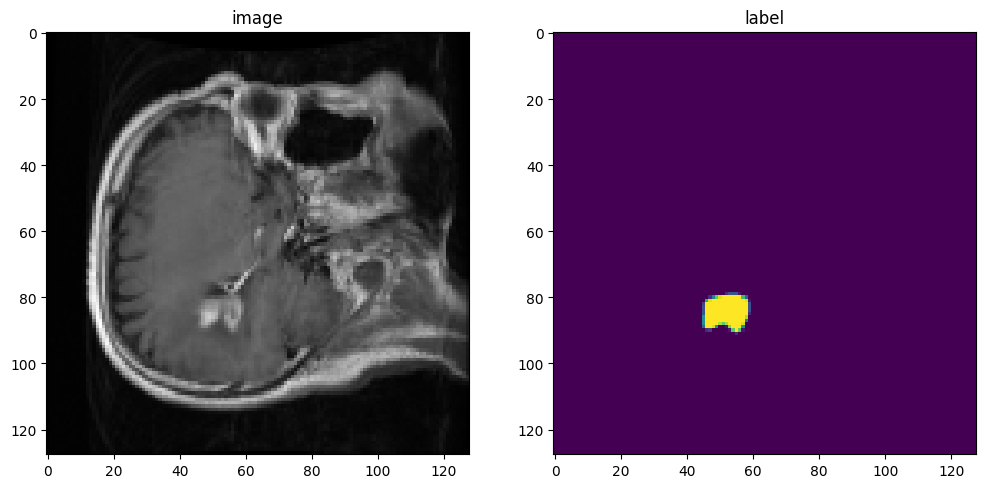

In [105]:
show_patient(train_loader, train=True, test=False)

/usr/local/lib/python3.11/dist-packages/monai/transforms/spatial/array.py:639: UserWarning: axcodes ('RAS') length is smaller than number of input spatial dimensions D=2.
Orientation: spatial shape = (512, 512), channels = 1,please make sure the input is in the channel-first format.
  warnings.warn(


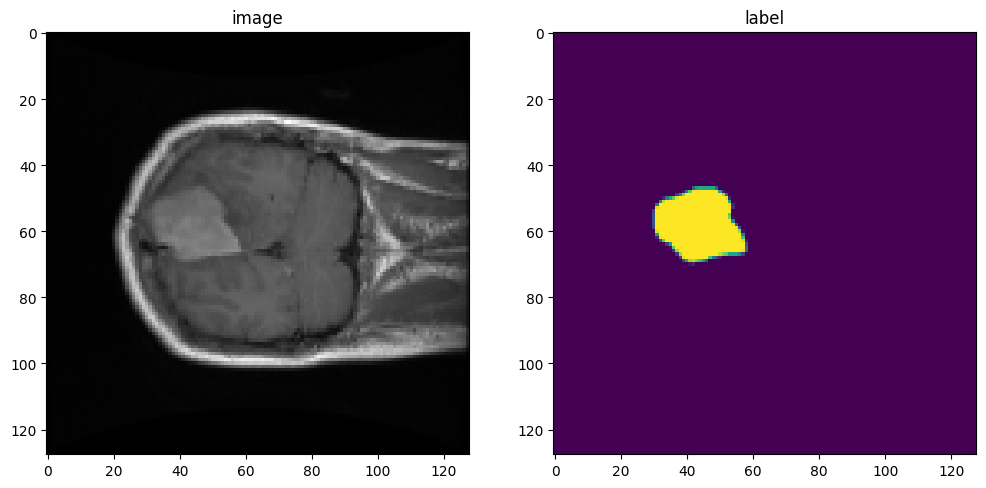

In [106]:
show_patient(test_loader, train=False, test=True)

In [109]:
model_dir = '/content/model'

In [110]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

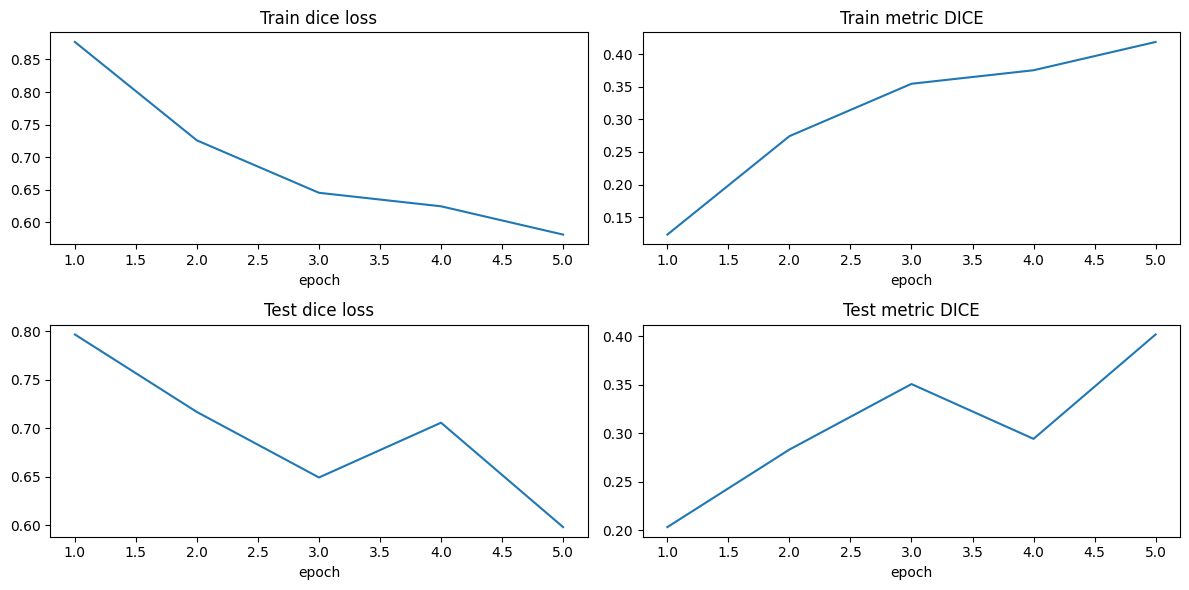

In [112]:
plt.figure("Results 25 June", (12, 6))

plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.title("Test dice loss")
x = [i + 1 for i in range(len(test_loss))]
y = test_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.title("Test metric DICE")
x = [i + 1 for i in range(len(test_metric))]
y = test_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.tight_layout()
plt.show()


In [113]:
model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

<ipython-input-113-03d54dd43ce3>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(


UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (adn): ADN(
            (N): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (adn): ADN(
            (N): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(
            (unit

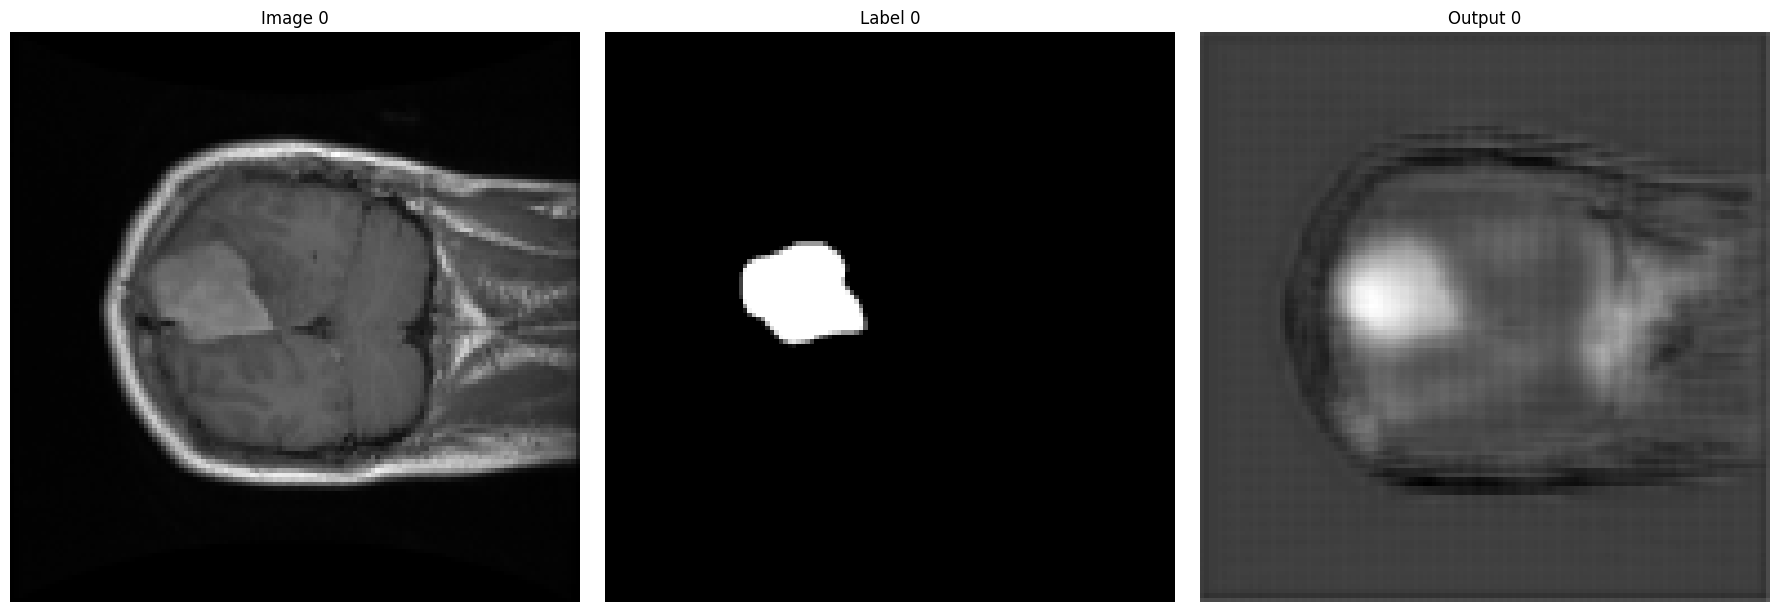

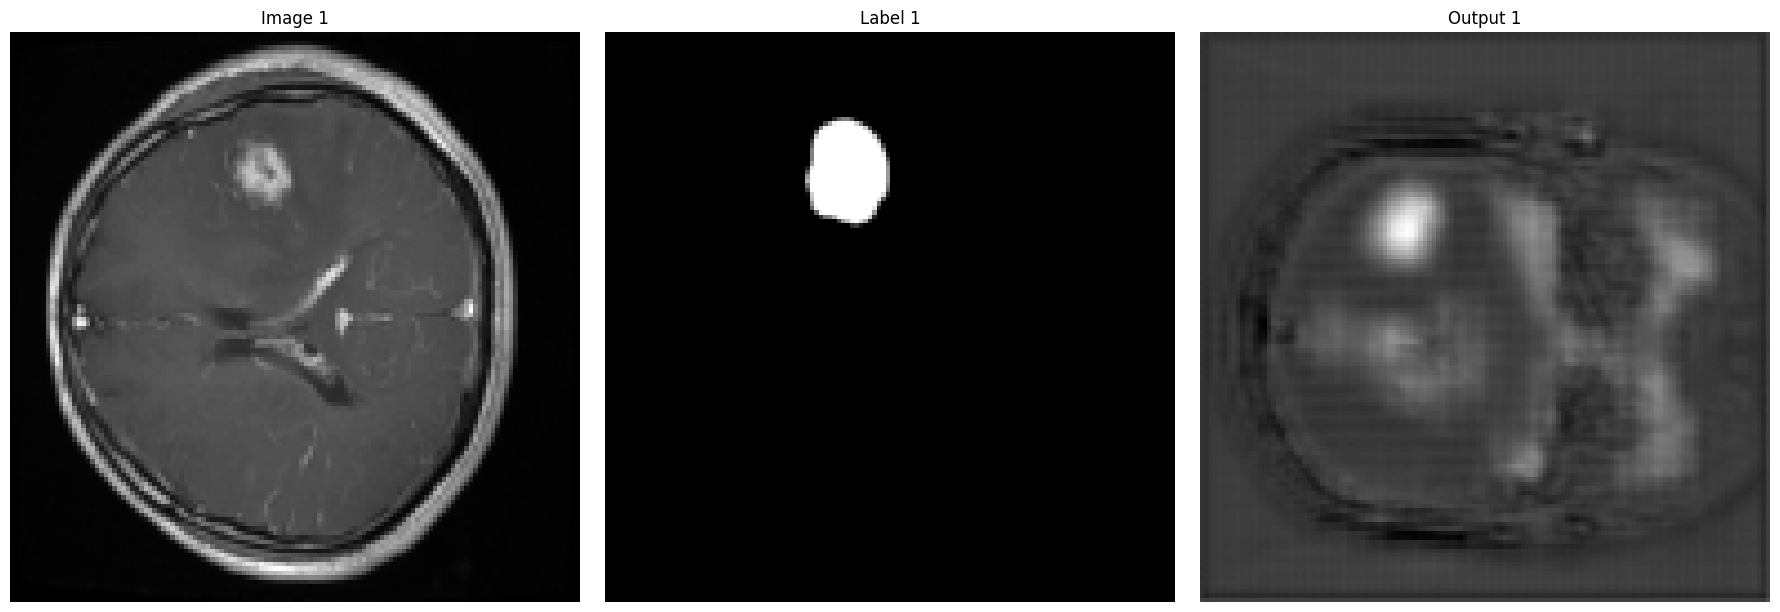

In [123]:
def run_inference(model, dataloader, device):
    model.eval()
    results = []

    with torch.no_grad():
        for batch in dataloader:
            images = batch['image'].to(device)
            outputs = model(images)
            results.append(outputs.cpu().numpy())

    return results

results = run_inference(model, test_loader, device)

for i in range(2):
    sample_image = test_loader.dataset[i]['image'][0]
    sample_label = test_loader.dataset[i]['seg'][0]
    sample_output = results[i][0]

    # Squeeze the sample_output to remove the extra dimension
    sample_output = np.squeeze(sample_output)

    plt.figure(f"Sample {i}", (18, 6))

    plt.subplot(1, 3, 1)
    plt.title(f"Image {i}")
    plt.imshow(sample_image, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f"Label {i}")
    plt.imshow(sample_label, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Output {i}")
    plt.imshow(sample_output, cmap="gray")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
